<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/Copy_of_1_Load_save_every_format_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 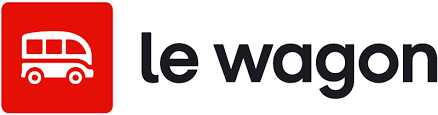

# Load & save different formats

## CSV files

You are working as a Data Analyst at Greenweez and someone from the marketing team asks you to help open `gwz_orders_samples_other_format.csv` as they are having some issues.

Import [gwz_orders_samples_other_format.csv](https://drive.google.com/file/d/14XBnRoi_S4PYi0JHQJHoRciwhXJZJUjX/view?usp=sharing) in colab and load it in a dataframe `df_orders`.

In [4]:
import pandas as pd
import gdown

file_id = '14XBnRoi_S4PYi0JHQJHoRciwhXJZJUjX'
url = f'https://drive.google.com/uc?id={file_id}'
output = '/content/gwz_orders_samples_other_format.csv'
gdown.download(url, output, quiet=False)

df_orders = pd.read_csv(output)

df_orders.head()



Downloading...
From: https://drive.google.com/uc?id=14XBnRoi_S4PYi0JHQJHoRciwhXJZJUjX
To: /content/gwz_orders_samples_other_format.csv
100%|██████████| 485k/485k [00:00<00:00, 106MB/s]


,\tdate_date\torders_id\tcustomers_id\tcountry\tdepartment\ttotal_quantity\ttotal_turnover
0,0\t2019-01-01\t571\t560\tFRANCE\t77.0\t52\t92.71
1,1\t2019-01-01\t287\t282\tFRANCE\t17.0\t19\t97.94
2,2\t2019-01-01\t113\t113\tFRANCE\t50.0\t20\t94.15
3,3\t2019-01-01\t519\t510\tFRANCE\t22.0\t8\t73.78
4,4\t2019-01-01\t224\t222\tFRANCE\t13.0\t2\t27.99


Is there something wrong with this data ?
Display `df_orders` and have a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to see how to solve this issue.

In [17]:
df_orders = pd.read_csv(output, delimiter='\t')

df_orders.head()


,Unnamed: 0,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,0,2019-01-01,571,560,FRANCE,77.0,52,92.71
1,1,2019-01-01,287,282,FRANCE,17.0,19,97.94
2,2,2019-01-01,113,113,FRANCE,50.0,20,94.15
3,3,2019-01-01,519,510,FRANCE,22.0,8,73.78
4,4,2019-01-01,224,222,FRANCE,13.0,2,27.99


3) Once you have managed to properly load the data, export it to a new `gwz_orders_samples_other_format_clean.csv` that the marketing team can use.

<details>
    <summary> Hint 🔍 </summary>
    The csv file doesn't need to include an index.  
    You should also make sure of the separator used!
    
</details>

In [12]:
cleaned_file_path = '/content/gwz_orders_samples_other_format_clean.csv'

df_orders.to_csv(cleaned_file_path, index=False, sep='\t')

cleaned_file_path


'/content/gwz_orders_samples_other_format_clean.csv'

CSV files can be misleading at times, but these issues can be solved in Python!

## Dealing with json files

Execute the following cell to initialize a dictionary `d`



In [13]:
d = {"firstname": "leonardo",
     "lastname": "dicaprio",
     "job": "actor"}

Create a file named `actors.json` from `d`. Have a look at the lecture if you are lost with the syntax.


In [14]:
import json

d = {
    "firstname": "leonardo",
    "lastname": "dicaprio",
    "job": "actor"
}

json_file_path = 'actors.json'

with open(json_file_path, 'w') as json_file:
    json.dump(d, json_file)

json_file_path


'actors.json'

Open the new `actors.json` file and add a new key `nationality` (Leonardo Dicaprio is American). \
Save the result to the same file name. Check your file.


In [16]:
import json

with open('actors.json', 'r') as json_file:
    actor_info = json.load(json_file)

actor_info['nationality'] = 'American'

with open('actors.json', 'w') as json_file:
    json.dump(actor_info, json_file)

actor_info


{'firstname': 'leonardo',
 'lastname': 'dicaprio',
 'job': 'actor',
 'nationality': 'American'}

## Working with Excel files

For this part of the challenge, imagine you are owner of mutliple restaurants. You are currently doing your accounting on Excel.

Download the [Excel file](https://docs.google.com/spreadsheets/d/1BFFYMoV85sqMHxkl5DSk6dg21XmCLtlb/edit?usp=sharing&ouid=101172426362035713447&rtpof=true&sd=true) and explore it.

How many sheets are there?
What kind of data do you have?

2 Sheets one each for 2 restaurants.Sheet 1 = Date,Turnover,Cost,Margin Sheet 2 = Poorly configured Date,Turnover,Cost,Margin
```


Import the Excel file into your Google Colab environment.  
Load the data from the *first sheet* in a `df_sales_restaurant_1` DataFrame

In [18]:
import pandas as pd

excel_url = 'https://docs.google.com/spreadsheets/d/1BFFYMoV85sqMHxkl5DSk6dg21XmCLtlb/export?format=xlsx'

df_sales_restaurant_1 = pd.read_excel(excel_url)

df_sales_restaurant_1.head()


,Date,Turnover,Cost,Margin
0,2021-12-01,1500,1200,300
1,2021-12-02,1200,900,300
2,2021-12-03,1900,1200,700
3,2021-12-04,2300,1500,800
4,2021-12-05,2100,1100,1000


How can you list all the sheets in an Excel file with Pandas ?  


<details>
    <summary> Hint 🔍 </summary>
    
`pd.ExcelFile()` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.ExcelFile.html) can help ...
</details>

In [20]:
import pandas as pd

excel_url = 'https://docs.google.com/spreadsheets/d/1BFFYMoV85sqMHxkl5DSk6dg21XmCLtlb/export?format=xlsx'

xls = pd.ExcelFile(excel_url)

sheet_names = xls.sheet_names

print("Sheet names:")
for sheet_name in sheet_names:
    print(sheet_name)

df_sales_restaurant_1 = pd.read_excel(xls, sheet_name=sheet_names[0])

df_sales_restaurant_1.head()



Sheet names:
Restaurant1
Restaurant2


,Date,Turnover,Cost,Margin
0,2021-12-01,1500,1200,300
1,2021-12-02,1200,900,300
2,2021-12-03,1900,1200,700
3,2021-12-04,2300,1500,800
4,2021-12-05,2100,1100,1000


Now, load the data from the *second sheet* in a dataframe called `df_sales_restaurant_2`.


<details>
    <summary> Hint 🔍 </summary>
    How can you choose the sheet you want to access ? Consult the documentation or StackOverflow if you're having doubts.
</details>

In [22]:
df_sales_restaurant_2 = pd.read_excel(xls, sheet_name=sheet_names[1])

df_sales_restaurant_2.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Date,Turnover,Cost,Margin
3,NaN,NaN,2021-12-01 00:00:00,700,600,100
4,NaN,NaN,2021-12-02 00:00:00,920,540,380


Do you notice anything unusual with this dataframe ? Inspect the sheet in the Excel file again, and try to understand the reason behind the weird format

Poorly configured sheet, missing rows and columns.

Modify your previous line of code to load the data correctly. \
Have a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) if you're having doubts.

In [24]:
df_sales_restaurant_2 = df_sales_restaurant_2.dropna(axis=1, how='all')

df_sales_restaurant_2 = df_sales_restaurant_2.dropna(axis=0, how='all')

df_sales_restaurant_2.head()


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,Date,Turnover,Cost,Margin
3,2021-12-01 00:00:00,700,600,100
4,2021-12-02 00:00:00,920,540,380
5,2021-12-03 00:00:00,810,600,210
6,2021-12-04 00:00:00,1000,300,700


Add in each dataframe a new `restaurant_id`column (id = 1 for restaurant_1 and id = 2 for restaurant_2) and concatenate the two dataframes into a single one named `df_sales`.  

Pay attention to the `axis`along which you will concatenate the two dataframes.

In [26]:
df_sales_restaurant_1['restaurant_id'] = 1
df_sales_restaurant_2['restaurant_id'] = 2

df_sales = pd.concat([df_sales_restaurant_1, df_sales_restaurant_2], axis=0, ignore_index=True)

df_sales.head()


,Date,Turnover,Cost,Margin,restaurant_id,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2021-12-01,1500.0,1200.0,300.0,1,NaN,NaN,NaN,NaN
1,2021-12-02,1200.0,900.0,300.0,1,NaN,NaN,NaN,NaN
2,2021-12-03,1900.0,1200.0,700.0,1,NaN,NaN,NaN,NaN
3,2021-12-04,2300.0,1500.0,800.0,1,NaN,NaN,NaN,NaN
4,2021-12-05,2100.0,1100.0,1000.0,1,NaN,NaN,NaN,NaN


Export the concatenated dataframe to a new `restaurants_accountability_full.xlsx` file in a sheet called `All`



In [28]:
excel_output_path = 'restaurants_accountability_full.xlsx'

df_sales.to_excel(excel_output_path, sheet_name='All', index=False)

excel_output_path


'restaurants_accountability_full.xlsx'

## Working with an unidentified format


Someone from the team found a file named [`secret.pkl`](https://drive.google.com/file/d/1_oia73SoCZtZFsGbDrsffkSfdaj2Gt5O/view?usp=sharing).

Can you help them open it and find what's inside? Stackoverflow might have some answers!

In [57]:
import pickle

# URL of the file on Google Drive (replace FILE_ID with the actual file ID)
file_path = "secret(1).pkl"
with open ("secret(1).pkl", "rb") as f:
  secret_data = pickle.load(f)

secret_data







{'universe_secret_code_to_paradise': 42}

Note: if you want to open your file into a dataframe, you can usually just use pandas!